<a href="https://colab.research.google.com/github/MarjeteV/data602/blob/main/MV_assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 10**

In [ ]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#plotly or other graphing library

In [ ]:
# Load Iris dataset
iris = load_iris()

#  Boston dataset not available



**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [ ]:

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['target'] = iris.target

target_names = iris.target_names

first_5_rows = iris_df.head()

print("First 5 rows of iris dataset:")
print(first_5_rows)
print("\nTarget names:")
print(target_names)

First 5 rows of iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Target names:
['setosa' 'versicolor' 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [ ]:


#am I making up new observations?

knn_model = KNeighborsClassifier(n_neighbors=5)


knn_model.fit(iris.data, iris.target)

# Define new observations
new_observations = [
    [3.1, 2.5, 1.4, 1.2],  # Example observation 1
    [4.2, 2.3, 4.3, 1.3],  # Example observation 2
    [3.2, 3.6, 4.1, 2.5]   # Example observation 3
]

predictions = knn_model.predict(new_observations)

# Map encoded values to target names
target_names = iris.target_names
predicted_categories = [target_names[prediction] for prediction in predictions]

print("Predicted categories for new observations:")
print(predicted_categories)



Predicted categories for new observations:
['setosa', 'versicolor', 'versicolor']


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [ ]:


def knn_accuracy(split, neighbors):



    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2, random_state=42)

    # Create kNN model with specified number of neighbors
    knn_model = KNeighborsClassifier(n_neighbors=5)

    # Fit the model to the training data
    knn_model.fit(X_train, y_train)

    # Predict the labels for test data
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

print("Accuracy score:", accuracy)

Accuracy score: 1.0


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

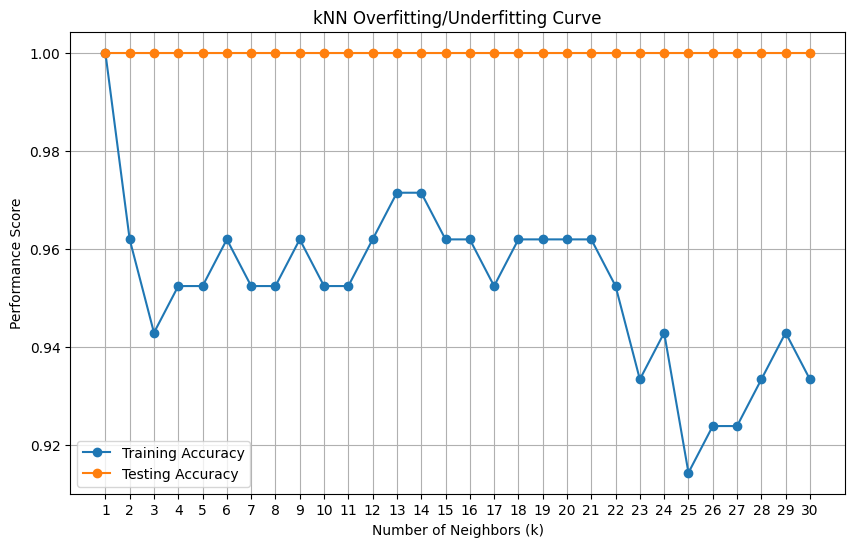

In [ ]:

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_accuracy = []
test_accuracy = []

neighbors = range(1, 31)

for k in neighbors:

    knn_model = KNeighborsClassifier(n_neighbors=k)


    knn_model.fit(X_train, y_train)

    y_train_pred = knn_model.predict(X_train)
    y_test_pred = knn_model.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))


plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', marker='o')
plt.title('kNN Overfitting/Underfitting Curve')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Performance Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()
